# Introduction to data visualization with Seasborn

### Datasets

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

countries_info = pd.read_csv('datasets/countries-of-the-world.csv')
masculinity = pd.read_csv('datasets/young-people-survey-responses.csv')
student_data = pd.read_csv('datasets/student-alcohol-consumption.csv', index_col=0)
mpg = pd.read_csv('datasets/mpg.csv')
survey_data_dataset = pd.read_csv('datasets/young-people-survey-responses.csv', index_col=0)

### Subsets

In [42]:
gdp = countries_info['GDP ($ per capita)']
phones = countries_info['Phones (per 1000)']
percent_literate = countries_info['Literacy (%)']
region = countries_info['Region']
survey_data = survey_data_dataset
survey_data['Age Category'] = ["Less than 21" if s < 21 else "21+" for s in survey_data_dataset['Age']]
survey_data['Interested in Math'] = [True if s > 3 else False for s in survey_data_dataset['Mathematics']]
map_dictionary = {1:"Never", 2:"Rarely", 3:"Sometimes Parents Advice", 4:"Often", 5:"Always"}
survey_data['Parents Advice'] = survey_data["Parents' advice"].map(map_dictionary)
survey_data['Feels Lonely'] = [True if s > 3 else False for s in survey_data_dataset['Loneliness']]
survey_data['Interested in Pets'] = ["Yes" if s > 3 else "No" for s in survey_data_dataset['Pets']]
survey_data['Likes Techno'] = [True if s > 3 else False for s in survey_data_dataset['Techno']]

condition_list = [(survey_data['Siblings'] == 0), (np.logical_or(survey_data['Siblings'] == 1, survey_data['Siblings'] == 2)), (survey_data['Siblings'] > 2)]
choice_list = ['0', '1-2', '3+']
survey_data['Number of Siblings'] = np.select(condition_list, choice_list)

mpg_mean = mpg.groupby(['model_year', 'origin']).agg({'mpg':'mean'})
mpg_mean.reset_index(inplace=True)
mpg_mean.rename(columns={'mpg':'mpg_mean'}, inplace=True)

## 1. Introduction to Seaborn

### Making a scatter plot with lists
Instructions:
<ul>
<li>Create a scatter plot of GDP (gdp) vs. number of phones per 1000 people (phones).</li>
<li>Display plot.</li>
<li>Change the scatter plot so it displays the percent of the population that can read and write (percent_literate) on the y-axis.</li>
</ul>

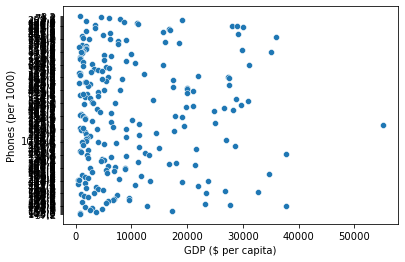

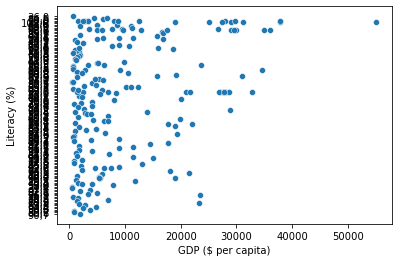

In [4]:
# Create scatter plot with GDP on the x-axis and number of phones on the y-axis
sns.scatterplot(x=gdp, y=phones)

# Show plot
plt.show()

# Change this scatter plot to have percent literate on the y-axis
sns.scatterplot(x=gdp, y=percent_literate)

# Show plot
plt.show()

### Making a count plot with a list
Instructions:
<ul>
<li>Import Matplotlib and Seaborn using the standard naming conventions.</li>
<li>Use Seaborn to create a count plot with region on the y-axis.</li>
<li>Display the plot.</li>
</ul>

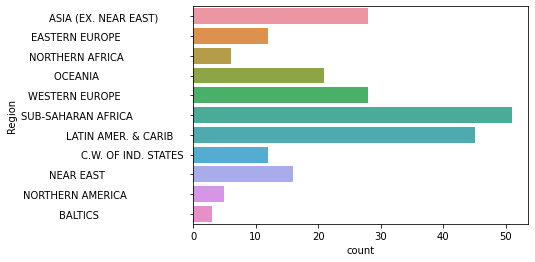

In [5]:
# Create count plot with region on the y-axis
sns.countplot(y=region)

# Show plot
plt.show()

### Making a count plot with a DataFrame
Instructions:
<ul>
<li>Use the countplot() function with the x= and data= arguments to create a count plot with the "Spiders" column values on the x-axis.</li>
<li>Display the plot.</li>
</ul>

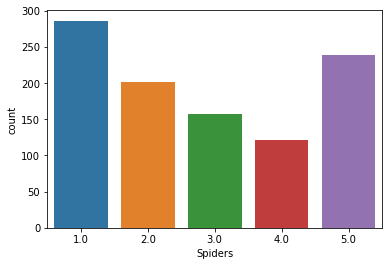

In [6]:
# Create a count plot with "Spiders" on the x-axis
sns.countplot(x='Spiders', data=masculinity)

# Display the plot
plt.show()

### Hue and scatter plots
Instructions:
<ul>
<li>Create a scatter plot with "absences" on the x-axis and final grade ("G3") on the y-axis using the DataFrame student_data. Color the plot points based on "location" (urban vs. rural).</li>
<li>Make "Rural" appear before "Urban" in the plot legend.</li>
</ul>

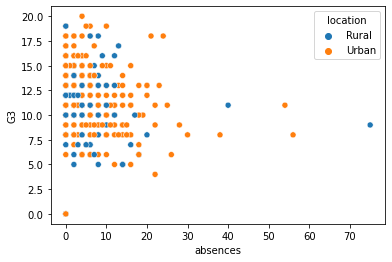

In [7]:
# Change the legend order in the scatter plot
sns.scatterplot(x="absences", y="G3", 
                data=student_data, 
                hue="location", hue_order=["Rural", "Urban"])

# Show plot
plt.show()

### Hue and count plots
Instructions:
<ul>
<li>Fill in the palette_colors dictionary to map the "Rural" location value to the color "green" and the "Urban" location value to the color "blue".</li>
<li>Create a count plot with "school" on the x-axis using the student_data DataFrame.</li>
    <ul>
    <li>Add subgroups to the plot using "location" variable and use the palette_colors dictionary to make the location subgroups green and blue.</li>
    </ul>
</ul>

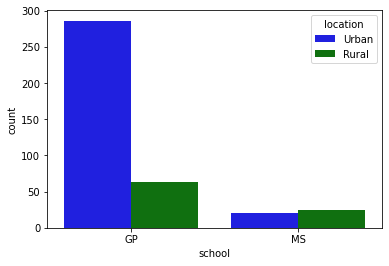

In [8]:
# Create a dictionary mapping subgroup values to colors
palette_colors = {"Rural": "green", "Urban": "blue"}

# Create a count plot of school with location subgroups
sns.countplot(x='school', data=student_data, hue='location', palette=palette_colors)

# Display plot
plt.show()

## 2. Visualizing Two Quantitative Variables

### Creating subplots with col and row
Instructions:
<ul>
<li>Modify the code to use <code>relplot()</code> instead of <code>scatterplot()</code>.</li>
<li>Modify the code to create one scatter plot for each level of the variable "study_time", arranged in columns.</li>
<li>Adapt your code to create one scatter plot for each level of a student's weekly study time, this time arranged in rows.</li>
</ul>

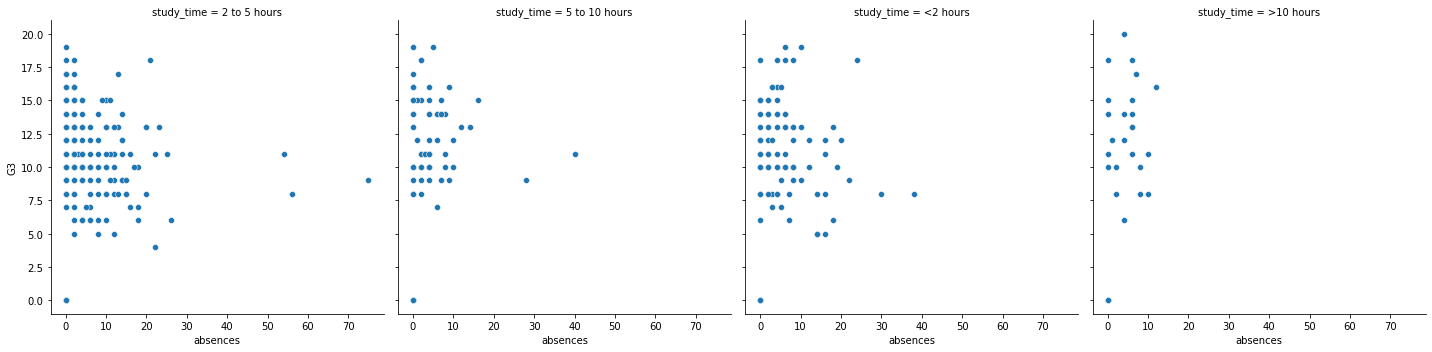

In [9]:
# Change this scatter plot to arrange the plots in rows instead of columns
sns.relplot(x="absences", y="G3", data=student_data, kind="scatter", col="study_time")

# Show plot
plt.show()

### Creating two-factor subplots
Instructions:
<ul>
<li>Use relplot() to create a scatter plot with "G1" on the x-axis and "G3" on the y-axis, using the student_data DataFrame.</li>
<li>Create column subplots based on whether the student received support from the school ("schoolsup"), ordered so that "yes" comes before "no".</li>
<li>Add row subplots based on whether the student received support from the family ("famsup"), ordered so that "yes" comes before "no". This will result in subplots based on two factors.</li>
</ul>

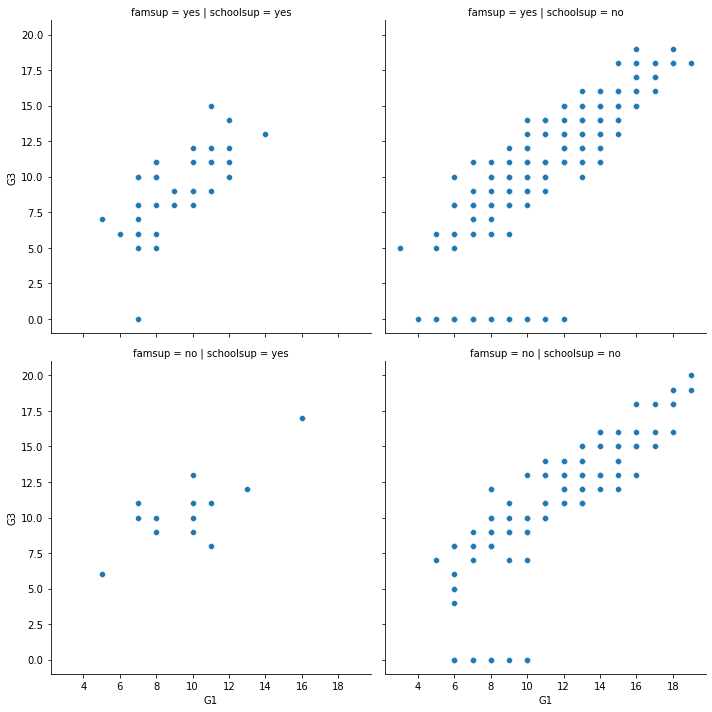

In [10]:
# Adjust further to add subplots based on family support
sns.relplot(x="G1", y="G3", data=student_data, kind="scatter", 
            col="schoolsup", col_order=["yes", "no"], 
            row="famsup", row_order=["yes", "no"])

# Show plot
plt.show()

### Changing the size of scatter plot points
Instructions:
<ul>
<li>Use <code>relplot()</code> and the mpg DataFrame to create a scatter plot with "horsepower" on the x-axis and "mpg" on the y-axis. Vary the size of the points by the number of cylinders in the car ("cylinders").</li>
<li>To make this plot easier to read, use hue to vary the color of the points by the number of cylinders in the car ("cylinders").</li>
</ul>

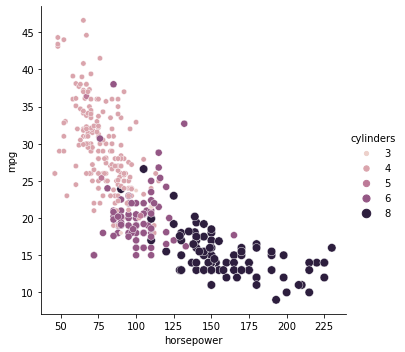

In [11]:
# Import Matplotlib and Seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Create scatter plot of horsepower vs. mpg
sns.relplot(x="horsepower", y="mpg", 
            data=mpg, kind="scatter", 
            size="cylinders", hue='cylinders')

# Show plot
plt.show()

### Changing the style of scatter plot points
Instructions:
<ul>
<li>Use <code>relplot()</code> and the mpg DataFrame to create a scatter plot with "acceleration" on the x-axis and "mpg" on the y-axis. Vary the style and color of the plot points by country of origin ("origin").</li>
</ul>

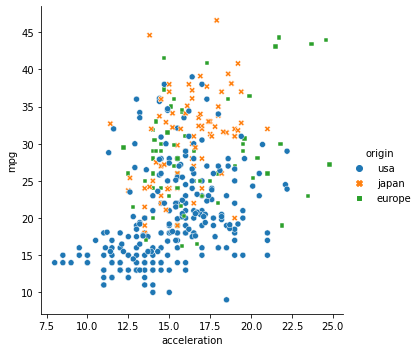

In [12]:
# Import Matplotlib and Seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot of acceleration vs. mpg
sns.relplot(x='acceleration', y='mpg', data=mpg, kind='scatter', hue='origin', style='origin')

# Show plot
plt.show()

### Interpreting line plots
Instructions:
<ul>
<li>Use <code>relplot()</code> and the mpg DataFrame to create a line plot with "model_year" on the x-axis and "mpg" on the y-axis.</li>
</ul>

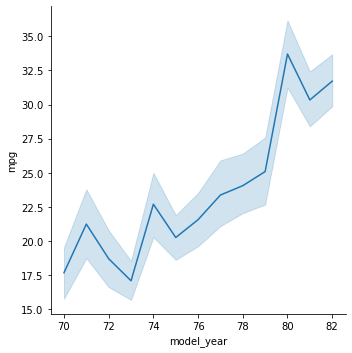

In [13]:
# Create line plot
sns.relplot(x='model_year', y='mpg', data=mpg, kind='line')

# Show plot
plt.show()

### Visualizing standard deviation with line plots
Instructions:
<ul>
<li>Change the plot so the shaded area shows the standard deviation instead of the confidence interval for the mean.</li>
</ul>

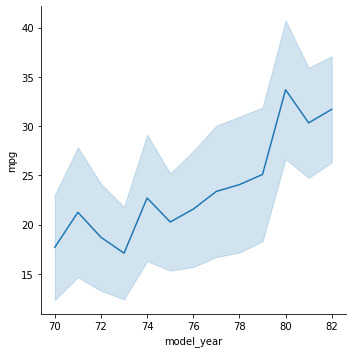

In [14]:
# Make the shaded area show the standard deviation
sns.relplot(x="model_year", y="mpg", data=mpg, kind="line", ci='sd')

# Show plot
plt.show()

### Plotting subgroups in line plots
Instructions:
<ul>
<li>Use <code>relplot()</code> and the mpg DataFrame to create a line plot with "model_year" on the x-axis and "horsepower" on the y-axis. Turn off the confidence intervals on the plot.</li>
<li>Create different lines for each country of origin ("origin") that vary in both line style and color.</li>
<li>Add markers for each data point to the lines.</li>
<li>Use the dashes parameter to use solid lines for all countries, while still allowing for different marker styles for each line.</li>
</ul>

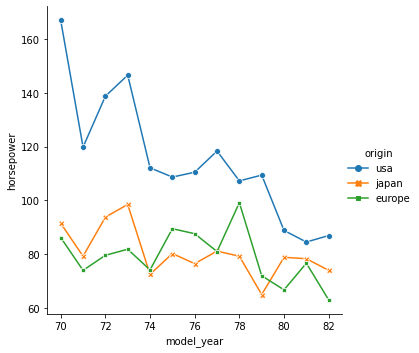

In [15]:
# Add markers and make each line have the same style
sns.relplot(x="model_year", y="horsepower", 
            data=mpg, kind="line", 
            ci=None, style="origin", 
            hue="origin", markers=True, dashes=False)

# Show plot
plt.show()

## 3. Visualizing a Categorical and a Quantitative Variable

### Count plots
Instructions:
<ul>
<li>Use <code>sns.catplot()</code> to create a count plot using the survey_data DataFrame with "Internet usage" on the x-axis.</li>
<li>Make the bars horizontal instead of vertical.</li>
<li>Separate this plot into two side-by-side column subplots based on "Age Category", which separates respondents into those that are younger than 21 vs. 21 and older.</li>
</ul>

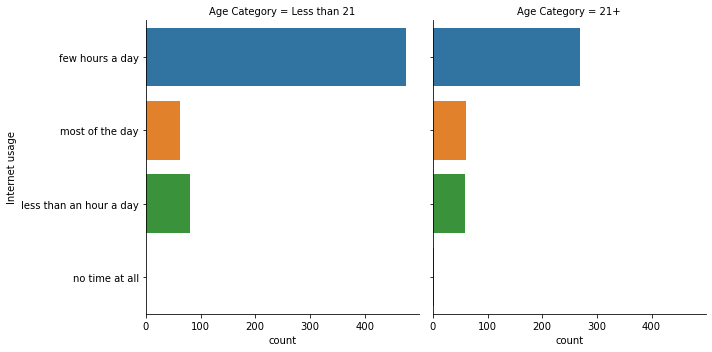

In [16]:
# Separate into column subplots based on age category
sns.catplot(y="Internet usage", data=survey_data,
            kind="count", col='Age Category')

# Show plot
plt.show()

### Bar plots with percentages
Instructions:
<ul>
<li>Use the survey_data DataFrame and sns.catplot() to create a bar plot with "Gender" on the x-axis and "Interested in Math" on the y-axis.</li>
</ul>

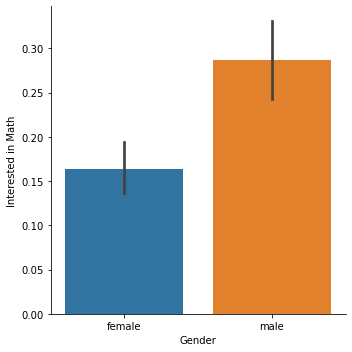

In [17]:
# Create a bar plot of interest in math, separated by gender
sns.catplot(x='Gender', y='Interested in Math', data=survey_data, kind='bar')

# Show plot
plt.show()

### Customizing bar plots
Instructions:
<ul>
<li>Use sns.catplot() to create a bar plot with "study_time" on the x-axis and final grade ("G3") on the y-axis, using the student_data DataFrame.</li>
<li>Using the order parameter and the category_order list that is provided, rearrange the bars so that they are in order from lowest study time to highest.</li>
<li>Update the plot so that it no longer displays confidence intervals.</li>
</ul>

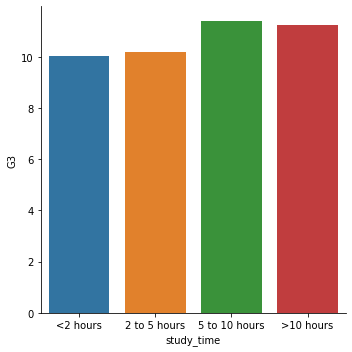

In [18]:
# List of categories from lowest to highest
category_order = ["<2 hours", 
                  "2 to 5 hours", 
                  "5 to 10 hours", 
                  ">10 hours"]

# Turn off the confidence intervals
sns.catplot(x="study_time", y="G3",
            data=student_data,
            kind="bar",
            order=category_order, ci=None)

# Show plot
plt.show()

### Create and interpret a box plot
Instructions:
<ul>
<li>Use <code>sns.catplot()</code> and the student_data DataFrame to create a box plot with "study_time" on the x-axis and "G3" on the y-axis. Set the ordering of the categories to study_time_order.</li>
</ul>

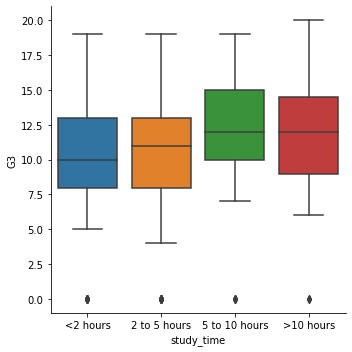

In [19]:
# Specify the category ordering
study_time_order = ["<2 hours", "2 to 5 hours", "5 to 10 hours", ">10 hours"]

# Create a box plot and set the order of the categories
sns.catplot(x='study_time', y='G3', data=student_data, kind='box', order=study_time_order)

# Show plot
plt.show()

### Omitting outliers
Instructions:
<ul>
<li>Use sns.catplot() to create a box plot with the student_data DataFrame, putting "internet" on the x-axis and "G3" on the y-axis.</li>
<li>Add subgroups so each box plot is colored based on "location".</li>
<li>Do not display the outliers.</li>
</ul>

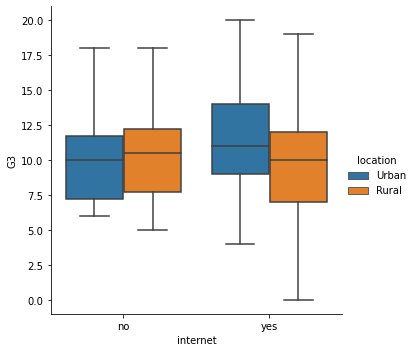

In [20]:
# Create a box plot with subgroups and omit the outliers
sns.catplot(x='internet', y='G3', data=student_data, kind='box', hue='location' ,sym='')

# Show plot
plt.show()

### Adjusting the whiskers
Instructions:
<ul>
<li>Adjust the code to make the box plot whiskers to extend to 0.5 * IQR. Recall: the IQR is the interquartile range.</li>
<li>Change the code to set the whiskers to extend to the 5th and 95th percentiles.</li>
<li>Change the code to set the whiskers to extend to the min and max values.</li>
</ul>

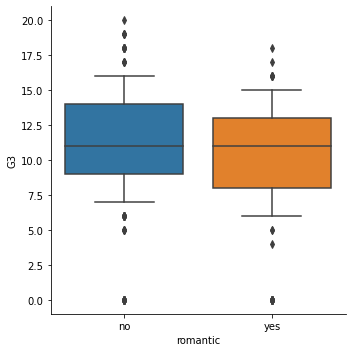

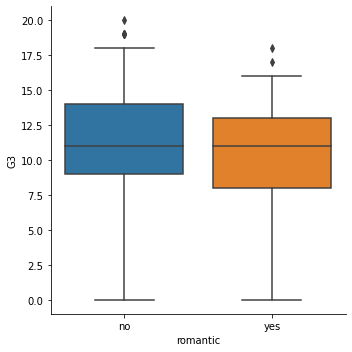

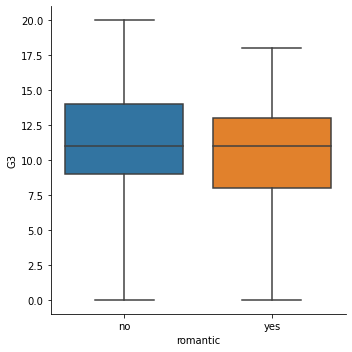

In [21]:
# Set the whiskers to 0.5 * IQR
sns.catplot(x="romantic", y="G3",
            data=student_data,
            kind="box", whis=0.5)

# Show plot
plt.show()

# Set the whiskers to 0.5 * IQR
sns.catplot(x="romantic", y="G3",
            data=student_data,
            kind="box", whis=[5,95])

# Show plot
plt.show()

# Set the whiskers to 0.5 * IQR
sns.catplot(x="romantic", y="G3",
            data=student_data,
            kind="box", whis=[0,100])

# Show plot
plt.show()

### Customizing point plots
Instructions:
<ul>
<li>Use sns.catplot() and the student_data DataFrame to create a point plot with "famrel" on the x-axis and number of absences ("absences") on the y-axis.</li>
<li>Add "caps" to the end of the confidence intervals with size 0.2.</li>
<li>Remove the lines joining the points in each category.</li>
</ul>

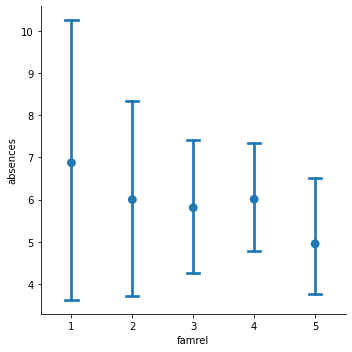

In [22]:
# Remove the lines joining the points
sns.catplot(x="famrel", y="absences", data=student_data, kind="point", capsize=0.2, join=False)
            
# Show plot
plt.show()

### Point plots with subgroups
Instructions:
<ul>
<li>Use <code>sns.catplot()</code> and the student_data DataFrame to create a point plot with relationship status ("romantic") on the x-axis and number of absences ("absences") on the y-axis. Color the points based on the school that they attend ("school").</li>
<li>Turn off the confidence intervals for the plot.</li>
<li>Since there may be outliers of students with many absences, use the median function that we've imported from numpy to display the median number of absences instead of the average.</li>
</ul>

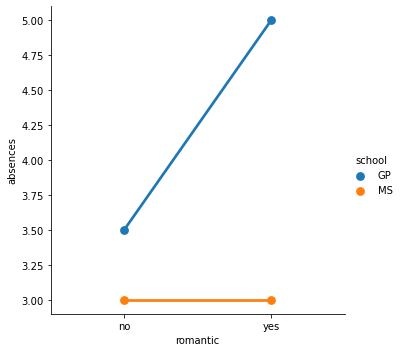

In [23]:
# Import median function from numpy
from numpy import median

# Plot the median number of absences instead of the mean
sns.catplot(x="romantic", y="absences",
			data=student_data,
            kind="point",
            hue="school",
            ci=None, estimator=median)

# Show plot
plt.show()

## 4. Customizing Seaborn Plots

### Changing style and palette
Instructions:
<ul>
<li>Set the style to "whitegrid" to help the audience determine the number of responses in each category.</li>
<li>Set the color palette to the sequential palette named "Purples".</li>
<li>Change the color palette to the diverging palette named "RdBu".</li>
</ul>

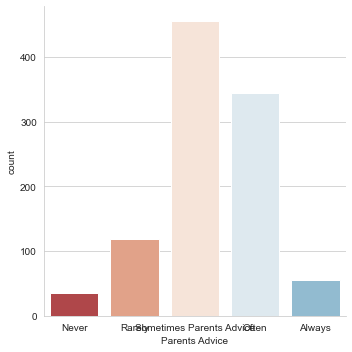

In [24]:
# Change the color palette to "RdBu"
sns.set_style("whitegrid")
sns.set_palette("RdBu")

# Create a count plot of survey responses
category_order = ["Never", "Rarely", "Sometimes Parents Advice", "Often", "Always"]

sns.catplot(x="Parents Advice", 
            data=survey_data, 
            kind="count", 
            order=category_order)

# Show plot
plt.show()

### Changing the scale
Instructions:
<ul>
<li>Set the scale ("context") to "paper", which is the smallest of the scale options.</li>
<li>Change the context to "notebook" to increase the scale.</li>
<li>Change the context to "talk" to increase the scale.</li>
<li>Change the context to "poster", which is the largest scale available.</li>
</ul>

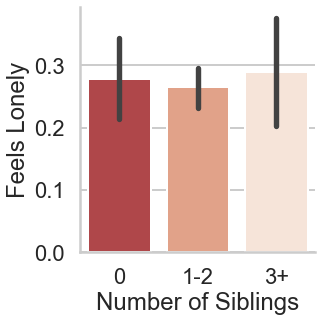

In [25]:
# Change the context to "poster"
sns.set_context("poster")

# Create bar plot
sns.catplot(x="Number of Siblings", y="Feels Lonely", data=survey_data, kind="bar", order = ['0', '1-2', '3+'])

# Show plot
plt.show()

### Using a custom palette
Instructions:
<ul>
<li>Set the style to "darkgrid".</li>
<li>Set a custom color palette with the hex color codes "#39A7D0" and "#36ADA4".</li>
</ul>

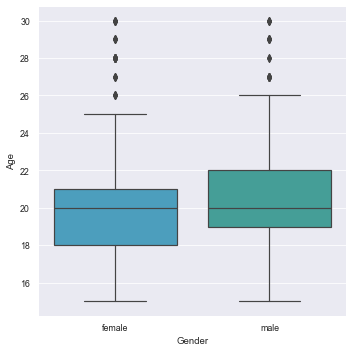

In [26]:
sns.set_context("paper")

# Set the style to "darkgrid"
sns.set_style('darkgrid')

# Set a custom color palette
sns.set_palette(['#39A7D0', '#36ADA4'])

# Create the box plot of age distribution by gender
sns.catplot(x="Gender", y="Age", 
            data=survey_data, kind="box")

# Show plot
plt.show()

### FacetGrids vs. AxesSubplots
Instructions:
<ul>
<li>Identify what type of object plot g is and assign it to the variable type_of_g.</li>
</ul>

<class 'seaborn.axisgrid.FacetGrid'>


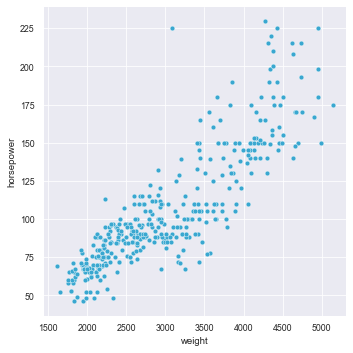

In [27]:
# Create scatter plot
g = sns.relplot(x="weight", 
                y="horsepower", 
                data=mpg,
                kind="scatter")

# Identify plot type
type_of_g = type(g)

# Print type
print(type_of_g)

### Adding a title to a FacetGrid object
Instructions:
<ul>
<li>Add the following title to this plot: "Car Weight vs. Horsepower".</li>
</ul>

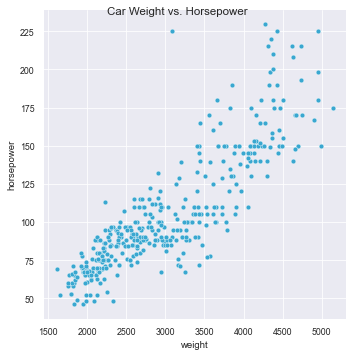

In [28]:
# Create scatter plot
g = sns.relplot(x="weight", 
                y="horsepower", 
                data=mpg,
                kind="scatter")

# Add a title "Car Weight vs. Horsepower"
g.fig.suptitle("Car Weight vs. Horsepower")

# Show plot
plt.show()

### Adding a title to a FacetGrid object
Instructions:
<ul>
<li>Add the following title to the plot: "Average MPG Over Time".</li>
<li>Label the x-axis as "Car Model Year" and the y-axis as "Average MPG".</li>
</ul>

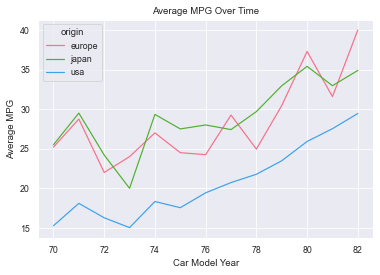

In [29]:
# Create line plot
g = sns.lineplot(x="model_year", y="mpg_mean", 
                 data=mpg_mean,
                 hue="origin")

# Add a title "Average MPG Over Time"
g.set_title("Average MPG Over Time")

# Add x-axis and y-axis labels

g.set(xlabel="Car Model Year", ylabel="Average MPG")

# Show plot
plt.show()

### Rotating x-tick labels
Instructions:
<ul>
<li>Rotate the x-tick labels 90 degrees.</li>
</ul>

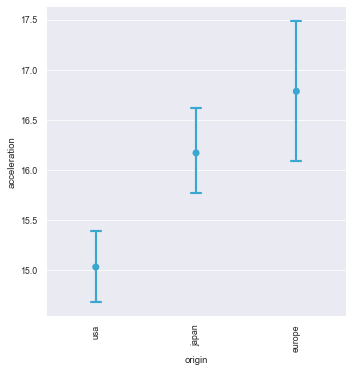

In [31]:
# Create point plot
sns.catplot(x="origin", 
            y="acceleration", 
            data=mpg, 
            kind="point", 
            join=False, 
            capsize=0.1)

# Rotate x-tick labels
plt.xticks(rotation=90)

# Show plot
plt.show()

### Box plot with subgroups
Instructions:
<ul>
<li>Set the color palette to "Blues".</li>
<li>Add subgroups to color the box plots based on "Interested in Pets".</li>
<li>Set the title of the FacetGrid object g to "Age of Those Interested in Pets vs. Not".</li>
<li>Make the plot display using a Matplotlib function.</li>
</ul>

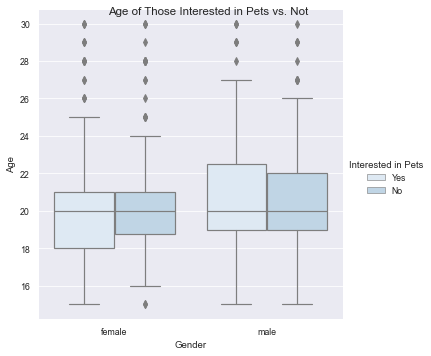

In [40]:
# Set palette to "Blues"
sns.set_palette('Blues')

# Adjust to add subgroups based on "Interested in Pets"
g = sns.catplot(x="Gender",
                y="Age", data=survey_data, 
                kind="box", hue='Interested in Pets')

# Set title to "Age of Those Interested in Pets vs. Not"
g.fig.suptitle("Age of Those Interested in Pets vs. Not")

# Show plot
plt.show()

### Bar plot with subgroups and subplots
Instructions:
<ul>
<li>Set the figure style to "dark".</li>
<li>Adjust the bar plot code to add subplots based on "Gender", arranged in columns.</li>
<li>Add the title "Percentage of Young People Who Like Techno" to this FacetGrid plot.</li>
<li>Label the x-axis "Location of Residence" and y-axis "% Who Like Techno".</li>
</ul>

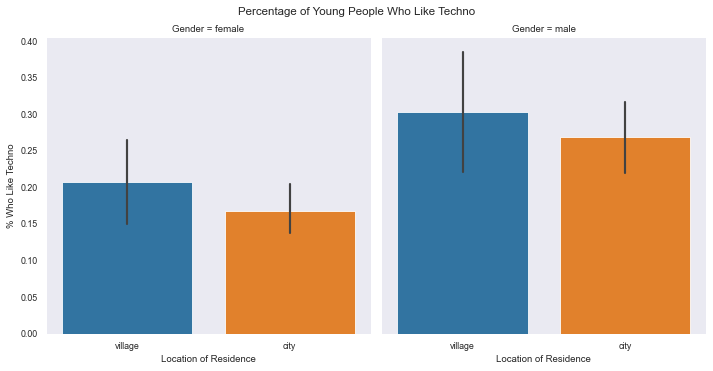

In [51]:
# Set the figure style to "dark"
sns.set_style('dark')
sns.set_palette("tab10")

# Adjust to add subplots per gender
g = sns.catplot(x="Village - town", y="Likes Techno", 
                data=survey_data, kind="bar",
                col="Gender")

# Add title and axis labels
g.fig.suptitle("Percentage of Young People Who Like Techno", y=1.02)
g.set(xlabel="Location of Residence", 
       ylabel="% Who Like Techno")

# Show plot
plt.show()